In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import math

In [2]:
df_regionales_2021 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/e294ab59-2cbf-4505-908e-a28e5a0eaa0c')

#df_municipales_2020 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/5129e7cf-2999-4eaf-8dd7-3bcda37bd0a3',encoding='ISO-8859-1',sep='\t')

df_municipales_2020 = pd.read_excel('Resultats_1er_tour_miunicipales_2020.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
liste = []
for i in range(1,10):
    liste.append([colonne for colonne in df_municipales_2020.columns if '.{}'.format(i) in colonne][:9])

In [4]:
df_municipales_2020

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Code B.Vote,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,...,% Voix/Exp.60,N.Pan..61,Code Nuance.61,Sexe.61,Nom.61,Prénom.61,Liste.61,Voix.61,% Voix/Ins.61,% Voix/Exp.61
0,1,Ain,1,L'Abergement-Clémenciat,1,622,340,54.66,282,45.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ain,2,L'Abergement-de-Varey,1,212,83,39.15,129,60.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Ain,4,Ambérieu-en-Bugey,1,1042,686,65.83,356,34.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Ain,4,Ambérieu-en-Bugey,2,1064,722,67.86,342,32.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Ain,4,Ambérieu-en-Bugey,3,1120,696,62.14,424,37.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68936,ZP,Polynésie française,758,Uturoa,2,1025,216,21.07,809,78.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68937,ZP,Polynésie française,758,Uturoa,3,1217,246,20.21,971,79.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68938,ZS,Saint-Pierre-et-Miquelon,502,Saint-Pierre,1,1405,613,43.63,792,56.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68939,ZS,Saint-Pierre-et-Miquelon,502,Saint-Pierre,2,1375,612,44.51,763,55.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#pd.DataFrame(liste)

In [7]:
#list(df_municipales_2020.columns)[:40]

In [8]:
df_municipales_2020[df_municipales_2020['Code du département']==75].groupby(['Libellé de la commune'])['Votants'].sum().sum()

563625

In [9]:
df_municipales_2020[df_municipales_2020['Code du département']==75]['Libellé de la commune'].unique()

array(['Paris'], dtype=object)

In [10]:
df_regionales_2021

,url,region_code,region_name,section_code,section_name,commune_code,commune_name,num_tour,inscrits_nb,abstention_nb,...,exprimes_pourc_votants,liste_code,liste_nom,liste_tete_nom,liste_tete_prenom,liste_tete_civilite,liste_nuance,liste_score_voix,liste_score_pourc_exprim,liste_score_pourc_inscrits
0,https://elections.interieur.gouv.fr/telecharge...,1,Guadeloupe,0100,Section fictive,ZA101,Les Abymes,1,40592,28509,...,93.24,01L006,Continuons d'avancer,CHALUS,Ary,M.,LDVC,4930,43.76,12.15
1,https://elections.interieur.gouv.fr/telecharge...,1,Guadeloupe,0100,Section fictive,ZA101,Les Abymes,1,40592,28509,...,93.24,01L007,Avenir Identité Régionale Guadeloupe,PIRBAKAS,Maxette,Mme,LDVD,287,2.55,0.71
2,https://elections.interieur.gouv.fr/telecharge...,1,Guadeloupe,0100,Section fictive,ZA101,Les Abymes,1,40592,28509,...,93.24,01L012,Faire partie de la solution,WILLIAM,"Willy, Kévin",M.,LDIV,186,1.65,0.46
3,https://elections.interieur.gouv.fr/telecharge...,1,Guadeloupe,0100,Section fictive,ZA101,Les Abymes,1,40592,28509,...,93.24,01L009,SENTINELLES GUADELOUPE,CORIOLAN,Eric,M.,LDIV,381,3.38,0.94
4,https://elections.interieur.gouv.fr/telecharge...,1,Guadeloupe,0100,Section fictive,ZA101,Les Abymes,1,40592,28509,...,93.24,01L013,La région au service du peuple (respe),NANOR,"Christelle, Renée",Mme,LDIV,163,1.45,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293501,https://elections.interieur.gouv.fr/telecharge...,94,Corse,9400,Section fictive,2B366,Chisa,1,174,62,...,99.11,94L010,"CORSE, TERRE DE PROGRES",ORSUCCI,Jean-Charles,M.,LDVG,12,10.81,6.90
293502,https://elections.interieur.gouv.fr/telecharge...,94,Corse,9400,Section fictive,2B366,Chisa,1,174,62,...,99.11,94L008,FÀ POPULU INSEME,SIMEONI,Gilles,M.,LREG,52,46.85,29.89
293503,https://elections.interieur.gouv.fr/telecharge...,94,Corse,9400,Section fictive,2B366,Chisa,1,174,62,...,99.11,94L011,AVANZEMU,ANGELINI,Jean-Christophe,M.,LREG,10,9.01,5.75
293504,https://elections.interieur.gouv.fr/telecharge...,94,Corse,9400,Section fictive,2B366,Chisa,1,174,62,...,99.11,94L007,CORE IN FRONTE,BENEDETTI,Paul-Félix,M.,LREG,0,0.00,0.00


In [11]:
df_regionales_2021[df_regionales_2021['region_name']=='Île-de-France'].groupby(['liste_tete_nom'])['liste_score_voix'].sum()

liste_tete_nom
ARTHAUD          37709
AUTAIN          275431
BARDELLA        321134
BAYOU           363134
BERLINGEN        13026
BROT             13364
CONTI             4898
PAILHAC          43243
PULVAR          298815
PÉCRESSE        935162
SAINT-MARTIN    319831
Name: liste_score_voix, dtype: int64

In [12]:
df_regionales_2021['region_name'].unique()

array(['Guadeloupe', 'Martinique', 'Guyane', 'La Réunion',
       'Île-de-France', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté',
       'Normandie', 'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Occitanie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur", 'Corse'],
      dtype=object)

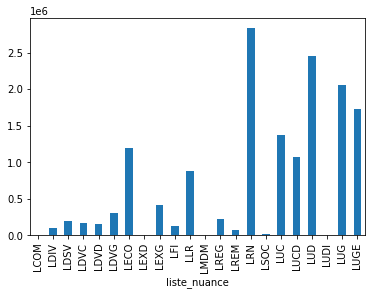

In [13]:
df_regionales_2021.groupby(['liste_nuance'])['liste_score_voix'].sum().plot(kind='bar')

In [20]:
df_regionales_2021['absention_perc']=100*df_regionales_2021['abstention_nb']/df_regionales_2021['inscrits_nb']

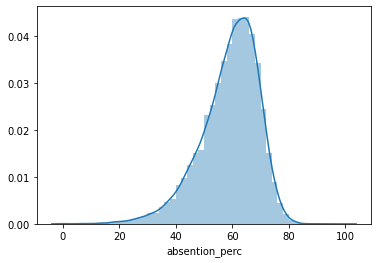

In [21]:
sns.distplot(df_regionales_2021.groupby(['commune_name'])['absention_perc'].mean())

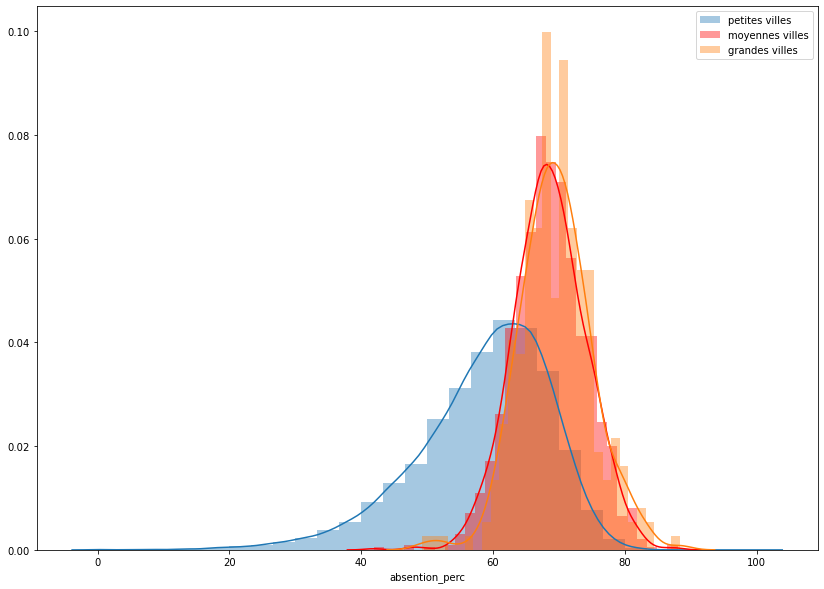

In [41]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
sns.distplot(df_regionales_2021[df_regionales_2021['inscrits_nb']<5000].groupby(['commune_name'])['absention_perc'].mean(),bins=30,ax=ax,label='petites villes')
sns.distplot(df_regionales_2021[df_regionales_2021['inscrits_nb'].between(5000,20000)].groupby(['commune_name'])['absention_perc'].mean(),
             bins=30,ax=ax,color='red',label='moyennes villes')
sns.distplot(df_regionales_2021[df_regionales_2021['inscrits_nb']>20000].groupby(['commune_name'])['absention_perc'].mean(),bins=30,ax=ax,label='grandes villes')
plt.legend()

In [38]:
df_regionales_2021.groupby(['commune_name'])['inscrits_nb'].mean().sum()

45621119.763879344

In [46]:
df_regionales_2021[df_regionales_2021['inscrits_nb']<20000].groupby(['commune_name'])['absention_perc'].mean().mean()

58.874147457667064

In [43]:
from scipy.stats import kruskal

In [44]:
kruskal(df_regionales_2021[df_regionales_2021['inscrits_nb']>20000].groupby(['commune_name'])['absention_perc'].mean().values,df_regionales_2021[df_regionales_2021['inscrits_nb']<20000].groupby(['commune_name'])['absention_perc'].mean().values)

KruskalResult(statistic=365.90878779903903, pvalue=1.455429054107444e-81)